In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [94]:
data = pd.read_csv("data.csv", sep=';')
data = data.drop(34, axis=0)
data.set_index('Provinsi', drop=True, inplace=True)
data

,poverty,unemployment,life_exp,PDRB,productivity_indust,energy,paddy_land,gas_used,emission
Provinsi,,,,,,,,,
ACEH,14.695,6.070,70.210,39156.00,84.992184,13.619148,271750.20,94.25,69.735747
SUMATERA UTARA,8.375,5.815,69.630,63194.18,115.081827,18.440712,411462.10,91.20,94.424179
SUMATERA BARAT,5.980,6.225,69.940,50593.41,98.116235,15.722145,271883.10,85.55,80.503978
RIAU,6.810,4.385,71.965,149914.13,241.327112,38.670256,51054.04,94.58,198.007930
JAMBI,7.660,4.645,71.530,76096.40,129.908374,20.816518,60539.59,91.05,106.589301
SUMATERA SELATAN,11.925,4.685,70.335,68338.10,115.639007,18.529994,513378.20,96.44,94.881343
BENGKULU,14.480,3.490,69.710,43741.71,69.483147,11.133979,57151.84,94.64,57.010644
LAMPUNG,11.505,4.415,71.020,45129.34,84.761230,13.582140,518256.10,90.99,69.546250
KEP. BANGKA BELITUNG,4.530,4.475,71.015,63752.24,114.202800,18.299857,15107.80,96.61,93.702940


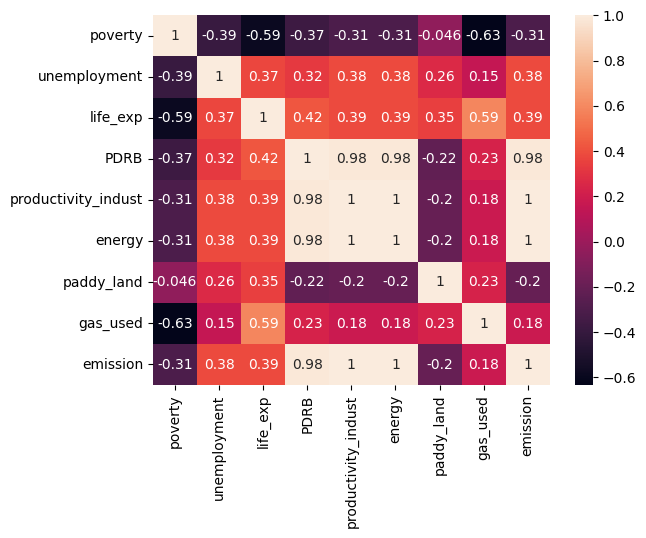

In [ ]:
sns.heatmap(data = data.corr(), annot=True)
plt.show()

In [11]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df['variable'] = data.columns 

vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

              variable           VIF
8             emission  7.036874e+13
5               energy  2.588276e+13
4  productivity_indust  1.186719e+13
3                 PDRB  1.369108e+02
2             life_exp  7.323398e+01
1         unemployment  2.371593e+01
7             gas_used  1.465970e+01
0              poverty  1.088231e+01
6           paddy_land  1.998852e+00


In [20]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)

kmo_model

0.577748964126313

In [21]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

c:\Users\zidan\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

If the `kmo_model` value is 0.7, this means that the data has a good enough fit for factor analysis. If this value is below 0.6, it may be worth considering collecting more data or using different variables.

In [24]:
data2 = data.drop('emission', axis=1)

kmo_all,kmo_model=calculate_kmo(data2)

kmo_model

0.7256107098057651

In [25]:
chi_square_value,p_value=calculate_bartlett_sphericity(data2)
chi_square_value, p_value

(1208.9531249319564, 7.1161168918955e-237)

If the p-value is small (typically p < 0.05), you reject the null hypothesis, which means that the correlation matrix is not an identity matrix and there are significant correlations among the variables, indicating that factor analysis may be appropriate.

c:\Users\zidan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zidan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zidan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zidan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

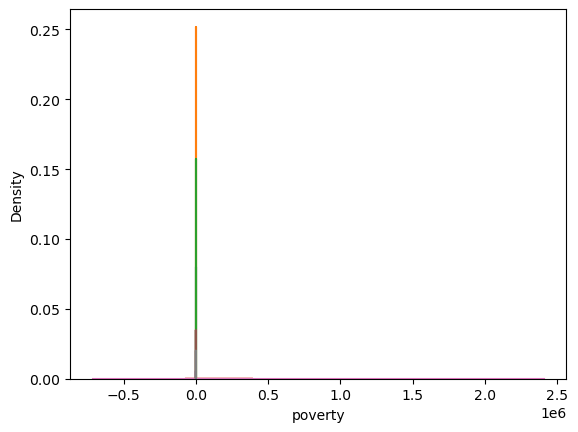

In [30]:
ax1.set_title('Before Standardize')

for col in data2.columns:
    sns.kdeplot(data[col])
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data2),
                            columns =scaler.get_feature_names_out())
data_scaled.head()

,poverty,unemployment,life_exp,PDRB,productivity_indust,energy,paddy_land,gas_used
0,0.852606,0.677360,-0.098717,-0.627462,-0.486175,-0.486175,-0.075336,0.548920
1,-0.365451,0.508919,-0.338753,-0.223796,-0.201990,-0.201990,0.219647,0.452035
2,-0.827041,0.779746,-0.210458,-0.435397,-0.362224,-0.362224,-0.075056,0.272559
3,-0.667075,-0.435675,0.627600,1.232469,0.990350,0.990350,-0.541307,0.559403
4,-0.503254,-0.263931,0.447573,-0.007132,-0.061959,-0.061959,-0.521280,0.447270


c:\Users\zidan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zidan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zidan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zidan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

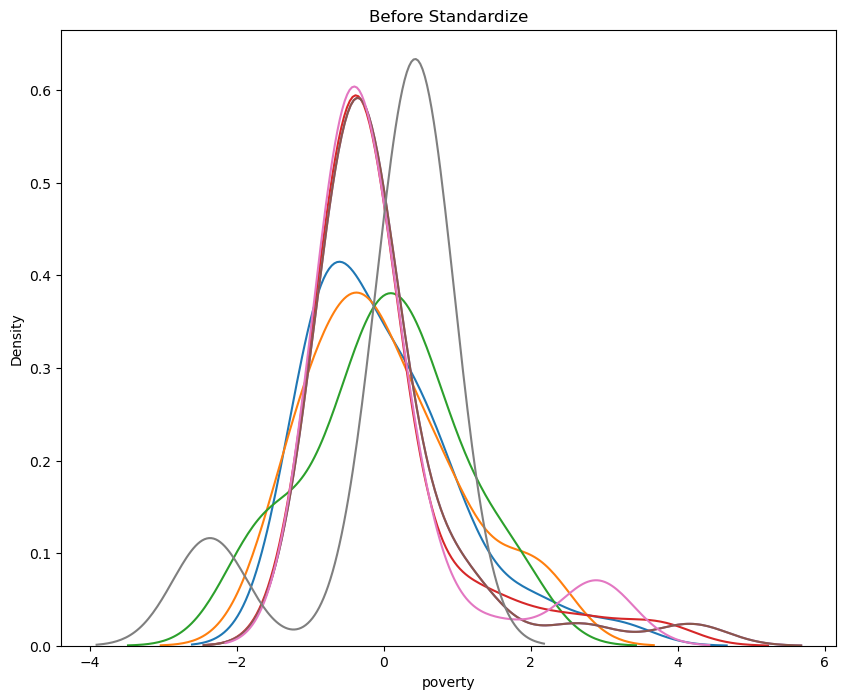

In [39]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Before Standardize')

for col in data2.columns:
    sns.kdeplot(data_scaled[col])
plt.show()

In [43]:
from sklearn.decomposition import PCA

pca = PCA()
data_pca = pd.DataFrame(pca.fit_transform(data_scaled), columns = pca.get_feature_names_out())

In [44]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([4.80513106e-01, 2.41439629e-01, 1.22809189e-01, 8.16168212e-02,
       4.16688891e-02, 3.00815176e-02, 1.87084819e-03, 3.04234593e-21])

In [45]:
# Access the eigenvalues (explained variance)
eigenvalues = pca.explained_variance_
print("Eigenvalues:")
print(eigenvalues)

# Calculate the cumulative variance explained by each component
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

print("Cumulative Variance Explained:")
print(cumulative_variance_ratio)

Eigenvalues:
[3.96059287e+00 1.99004785e+00 1.01224544e+00 6.72720466e-01
 3.43452662e-01 2.47944630e-01 1.54203245e-02 2.50763058e-20]
Cumulative Variance Explained:
[0.48051311 0.72195273 0.84476192 0.92637875 0.96804763 0.99812915
 1.         1.        ]


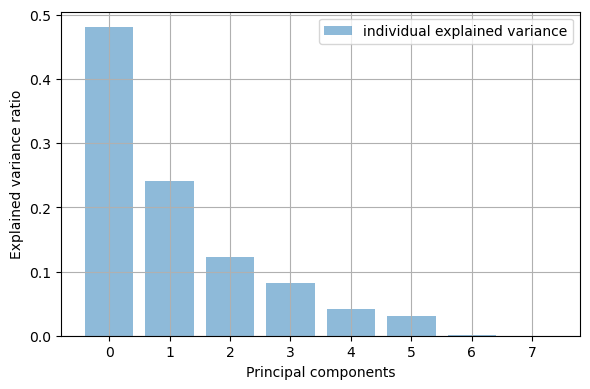

In [46]:
 plt.figure(figsize=(6, 4))

plt.bar(range(8), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
data_pca = pd.DataFrame(pca.fit_transform(data_scaled),
                        columns = pca.get_feature_names_out(),
                        index = data2.index)

In [49]:
# Access the eigenvalues (explained variance)
eigenvalues = pca.explained_variance_
print("Eigenvalues:")
print(eigenvalues)

# Calculate the cumulative variance explained by each component
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

print("Cumulative Variance Explained:")
print(cumulative_variance_ratio)

Eigenvalues:
[3.96059287 1.99004785 1.01224544]
Cumulative Variance Explained:
[0.48051311 0.72195273 0.84476192]


In [50]:
pca.components_[0:3]

array([[-0.32523588,  0.27890437,  0.34801548,  0.46226772,  0.45678177,
         0.45678177, -0.00723649,  0.25352756],
       [ 0.33568037, -0.1712009 , -0.38091245,  0.27435852,  0.29708944,
         0.29708944, -0.51411876, -0.4436211 ],
       [ 0.35613133,  0.59623581, -0.0248329 , -0.00713724,  0.08829449,
         0.08829449,  0.54289521, -0.45461927]])

In [54]:
# Get the principal components
components = pca.components_

# Create a DataFrame to display the component weights
component_names = [f'PC{i+1}' for i in range(components.shape[0])]
component_weights_df = pd.DataFrame(components, columns=data2.columns, index=component_names)

print("Principal Component Weights:")


Principal Component Weights:


,poverty,unemployment,life_exp,PDRB,productivity_indust,energy,paddy_land,gas_used
PC1,-0.325236,0.278904,0.348015,0.462268,0.456782,0.456782,-0.007236,0.253528
PC2,0.335680,-0.171201,-0.380912,0.274359,0.297089,0.297089,-0.514119,-0.443621
PC3,0.356131,0.596236,-0.024833,-0.007137,0.088294,0.088294,0.542895,-0.454619


In [56]:
explained_pc = component_weights_df.copy()

explained_pc = np.abs(explained_pc)

explained_pc.style.highlight_max(axis=0)

,poverty,unemployment,life_exp,PDRB,productivity_indust,energy,paddy_land,gas_used
PC1,0.325236,0.278904,0.348015,0.462268,0.456782,0.456782,0.007236,0.253528
PC2,0.335680,0.171201,0.380912,0.274359,0.297089,0.297089,0.514119,0.443621
PC3,0.356131,0.596236,0.024833,0.007137,0.088294,0.088294,0.542895,0.454619


**PC1:**
- PDRB
- productivity_indust
- energy

**PC2:**
- life_exp

**PC3:**
- poverty
- unemployment
- paddy_land
- gas_used

In [57]:
data_pca

,pca0,pca1,pca2
Provinsi,,,
ACEH,-0.717231,-0.457964,0.338134
SUMATERA UTARA,-0.032064,-0.575642,0.061369
SUMATERA BARAT,-0.049324,-0.747955,-0.049911
RIAU,1.934078,0.568320,-0.895016
JAMBI,0.303094,-0.263423,-0.844932
SUMATERA SELATAN,-0.275849,-0.486966,-0.105799
BENGKULU,-1.342884,0.060256,-0.965641
LAMPUNG,-0.691157,-0.800291,-0.212425
KEP. BANGKA BELITUNG,0.207933,-0.539555,-1.278512


In [60]:
pip install scikit-fuzzy

     ---------------------------------------- 0.0/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
     - ----------------------------------- 30.7/994.0 kB 220.2 kB/s eta 0:00:05
     -- ---------------------------------- 61.4/994.0 kB 328.2 kB/s eta 0:00:03
     --------- ---------------------------- 245.8/994.0 kB 1.1 MB/s eta 0:00:01
     ------------------ ------------------- 471.0/994.0 kB 1.7 MB/s eta 0:00:01
     ------------------------- ------------ 675.8/994.0 kB 2.2 MB/s eta 0:00:01
     ----------------------------------- -- 921.6/994.0 kB 2.5 MB/s eta 0:00:01
     -------------------------------------  993.3/994.0 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 994.0/994.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-fuzzy: fil

In [61]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [63]:
n_clusters = 3
 
# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    np.array(data_pca).T, n_clusters, 2, error=0.005, maxiter=1000, seed=42
)

# Predict cluster membership for each data point
cluster_membership = np.argmax(u, axis=0)

# Print the cluster centers
print('Cluster Centers:', cntr)
 
# Print the cluster membership for each data point
print('Cluster Membership:', cluster_membership)

Cluster Centers: [[ 4.58045478  1.32329503  0.15966214]
 [-1.89798274  1.4683153   0.65594523]
 [-0.09807123 -0.66685971 -0.26695145]]
Cluster Membership: [2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 1 1 2 2 2 0 0 2 2 2 2 2 1 1 1 1 1]


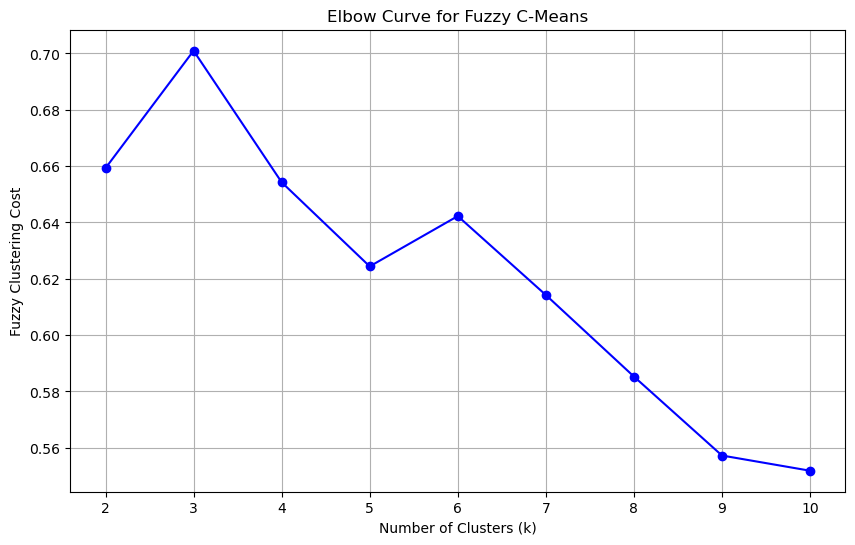

In [67]:
k_values = range(2, 11)
costs = []

for k in k_values:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(np.array(data_pca).T, k, m=2, error=0.005, maxiter=1000, seed=42)
    costs.append(fpc)


plt.figure(figsize=(10, 6))
plt.plot(k_values, costs, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Fuzzy C-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Fuzzy Clustering Cost')
plt.grid(True)
plt.show()


In [222]:
data_pca

,pca0,pca1,pca2
Provinsi,,,
ACEH,-0.717231,-0.457964,0.338134
SUMATERA UTARA,-0.032064,-0.575642,0.061369
SUMATERA BARAT,-0.049324,-0.747955,-0.049911
RIAU,1.934078,0.568320,-0.895016
JAMBI,0.303094,-0.263423,-0.844932
SUMATERA SELATAN,-0.275849,-0.486966,-0.105799
BENGKULU,-1.342884,0.060256,-0.965641
LAMPUNG,-0.691157,-0.800291,-0.212425
KEP. BANGKA BELITUNG,0.207933,-0.539555,-1.278512


In [74]:
n_clusters = 3
 
# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    np.array(data_pca).T, n_clusters, 3, error=0.005, maxiter=1000, init=None, seed=3
)

# Predict cluster membership for each data point
cluster_membership = np.argmax(u, axis=0)

# Print the cluster centers
print('Cluster Centers:', cntr)
 
# Print the cluster membership for each data point
print('Cluster Membership:', cluster_membership)

Cluster Centers: [[-1.38185552  0.93848175  0.18293604]
 [ 2.53596467  0.66777514 -0.00296153]
 [-0.13070883 -0.64133963 -0.22272654]]
Cluster Membership: [2 2 2 1 2 2 0 2 2 1 1 2 2 2 2 2 2 0 0 2 2 2 1 1 2 0 2 2 0 0 0 0 0 0]


In [75]:
data_pca['cluster'] = cluster_membership

c:\Users\zidan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zidan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zidan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


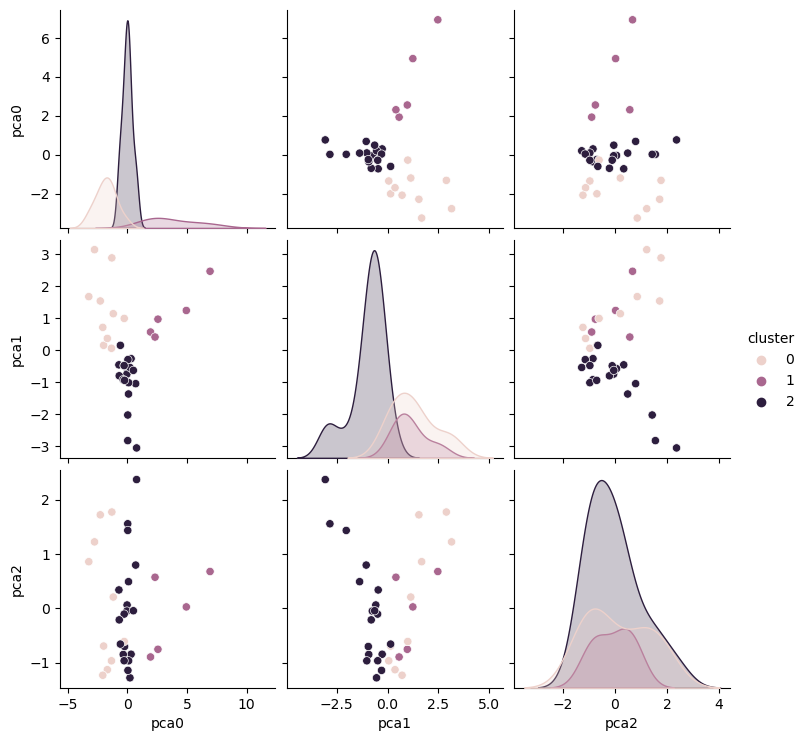

In [76]:
sns.pairplot(data_pca, hue='cluster')

In [95]:
data['cluster'] = cluster_membership
data

,poverty,unemployment,life_exp,PDRB,productivity_indust,energy,paddy_land,gas_used,emission,cluster
Provinsi,,,,,,,,,,
ACEH,14.695,6.070,70.210,39156.00,84.992184,13.619148,271750.20,94.25,69.735747,2
SUMATERA UTARA,8.375,5.815,69.630,63194.18,115.081827,18.440712,411462.10,91.20,94.424179,2
SUMATERA BARAT,5.980,6.225,69.940,50593.41,98.116235,15.722145,271883.10,85.55,80.503978,2
RIAU,6.810,4.385,71.965,149914.13,241.327112,38.670256,51054.04,94.58,198.007930,1
JAMBI,7.660,4.645,71.530,76096.40,129.908374,20.816518,60539.59,91.05,106.589301,2
SUMATERA SELATAN,11.925,4.685,70.335,68338.10,115.639007,18.529994,513378.20,96.44,94.881343,2
BENGKULU,14.480,3.490,69.710,43741.71,69.483147,11.133979,57151.84,94.64,57.010644,0
LAMPUNG,11.505,4.415,71.020,45129.34,84.761230,13.582140,518256.10,90.99,69.546250,2
KEP. BANGKA BELITUNG,4.530,4.475,71.015,63752.24,114.202800,18.299857,15107.80,96.61,93.702940,2
